In [31]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from helpers_optimization import *
from helpers_data import *
from helpers_visualization import *
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)
labels_feature = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",", dtype=str, max_rows=1)[2:]

In [33]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

In [35]:
ss_y = ss1_y
ss_tX = ss1_tX

# Optimisaton of the hyper-parameters 

### Without features selection and augmentation

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


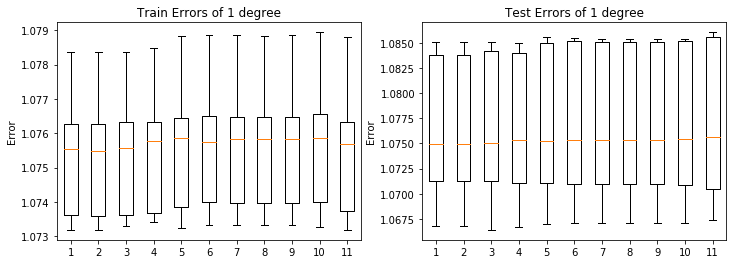

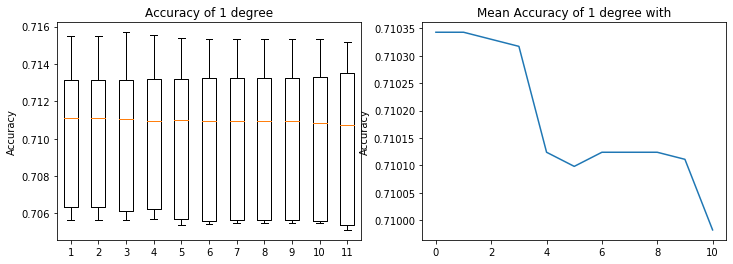

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


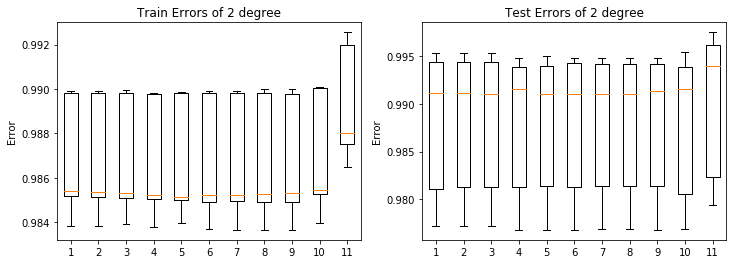

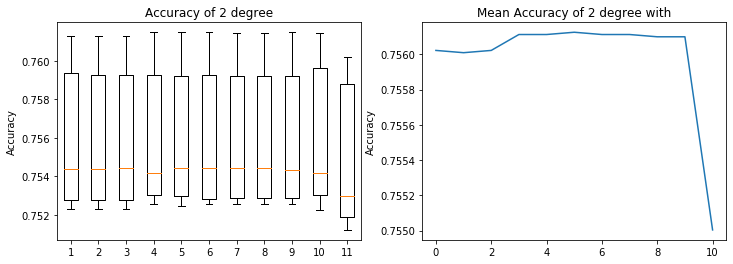

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


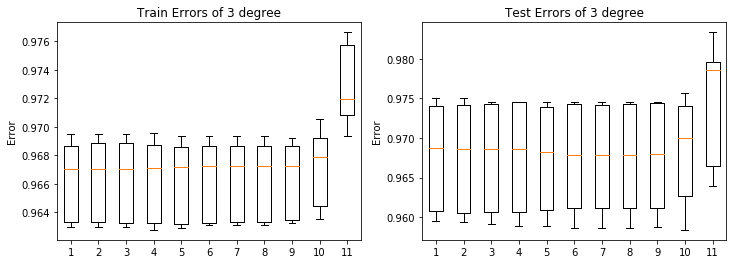

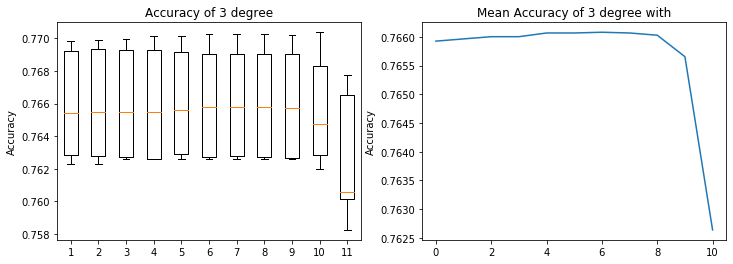

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


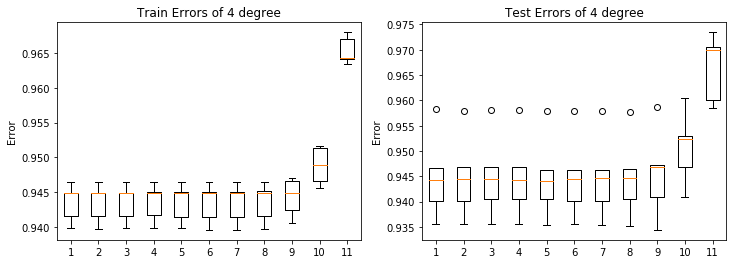

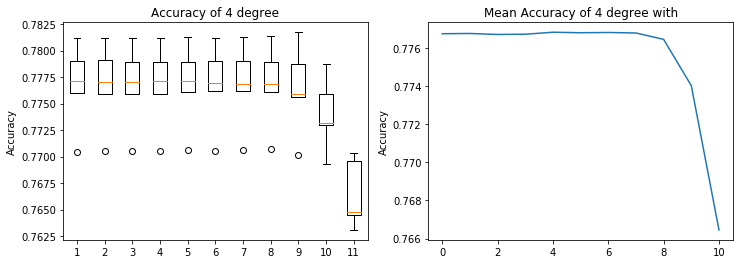

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


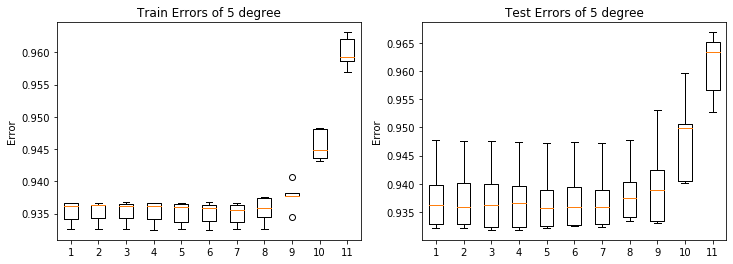

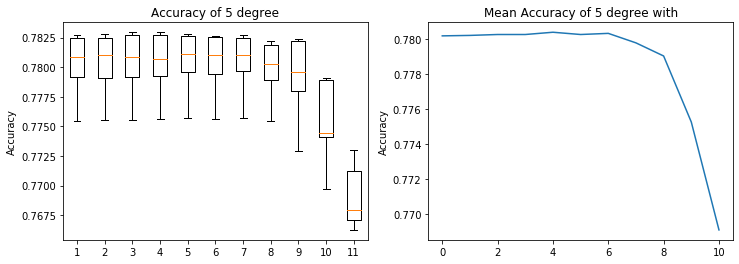

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


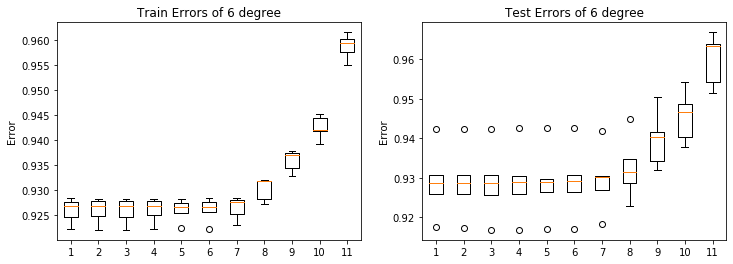

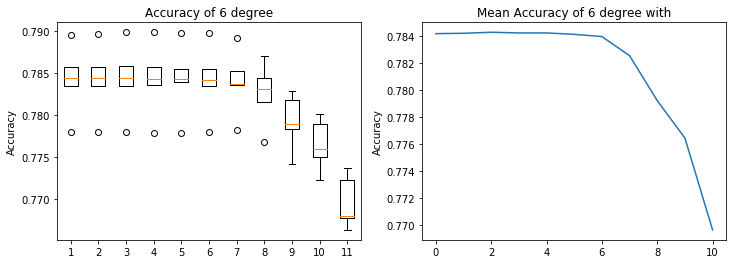

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


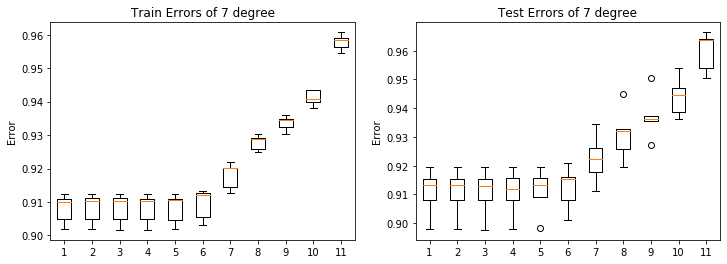

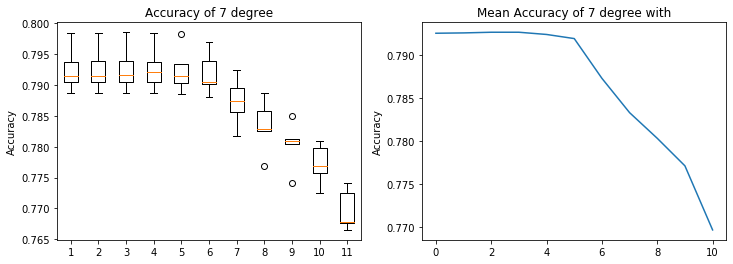

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


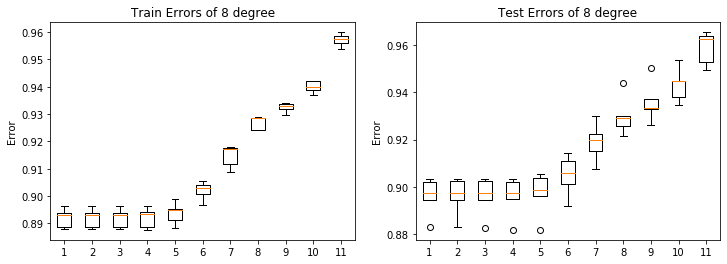

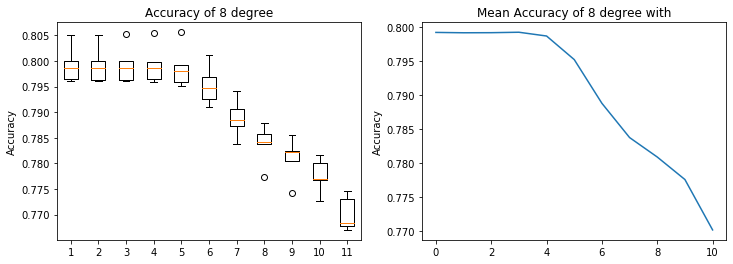

In [6]:
# RMSE - With Outliers

lambdas = np.logspace(-15, -3, 11)
degrees = np.linspace(1,8,8, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr', feature_augmentation=False, hyperparams=[lambdas, False])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)
    
    

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


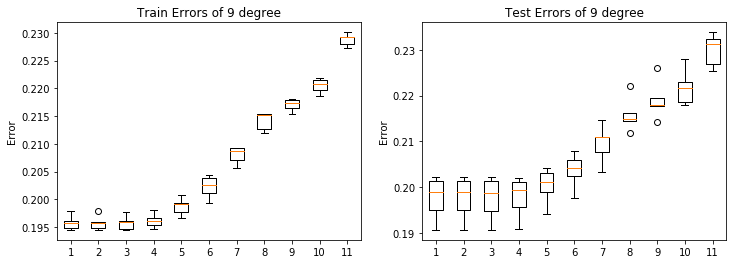

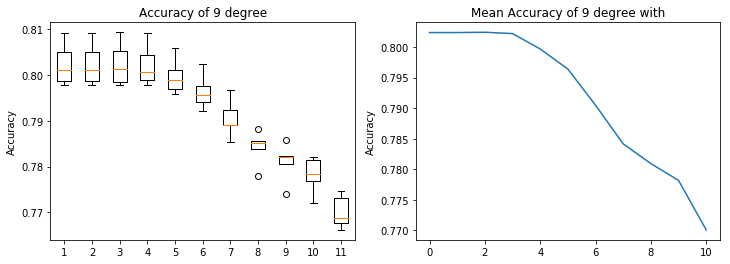

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


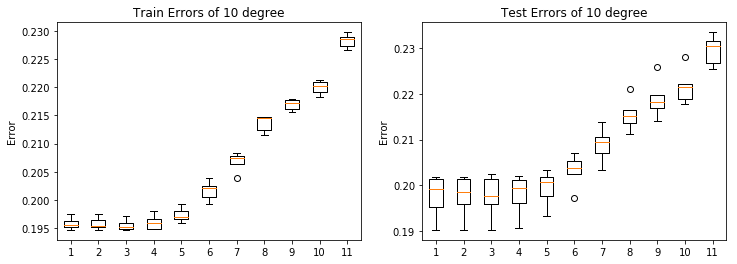

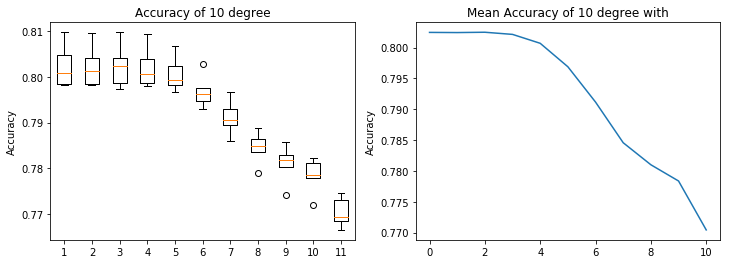

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


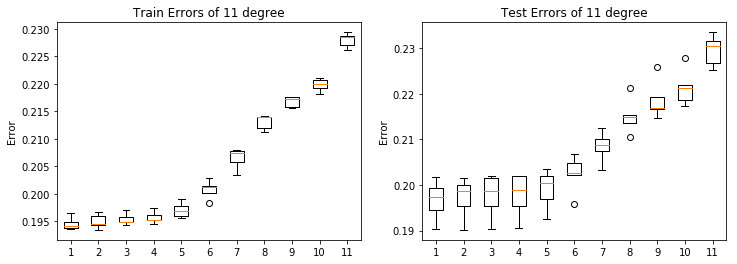

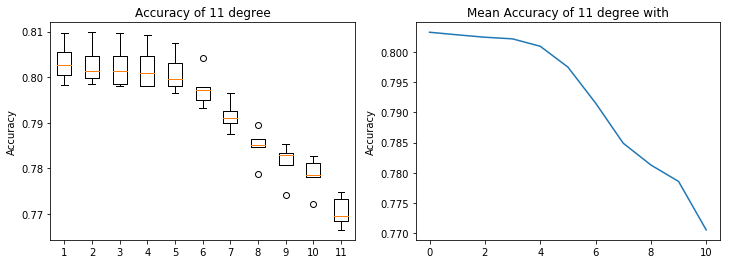

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


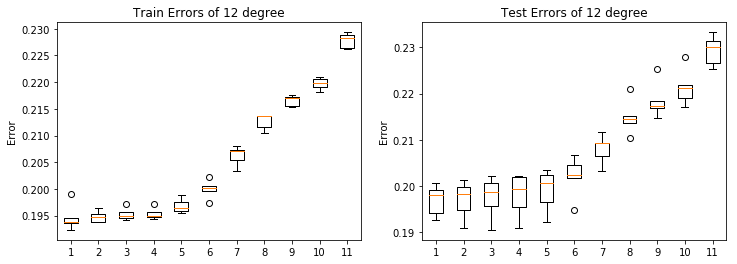

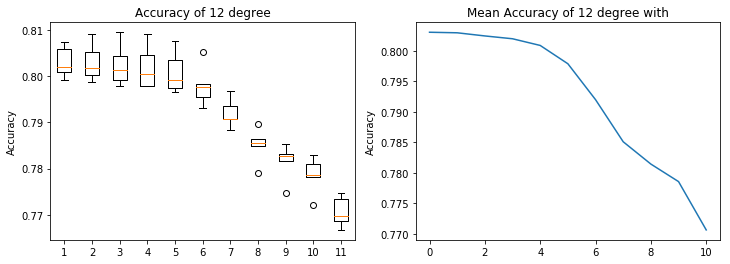

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


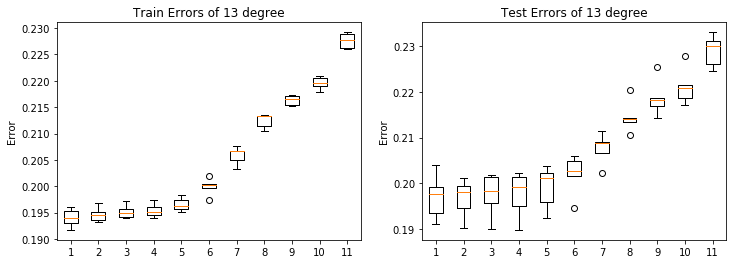

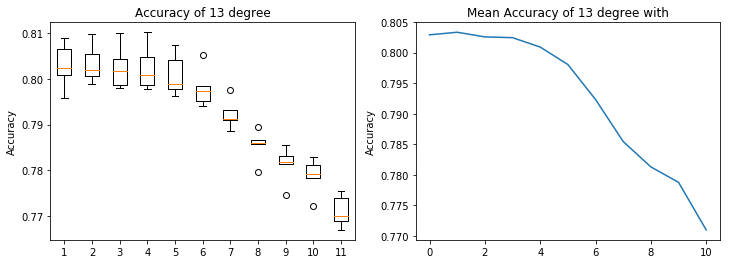

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


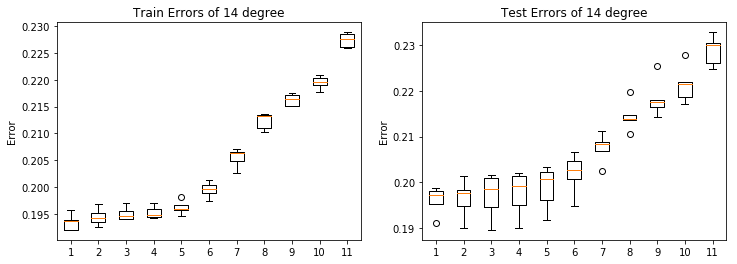

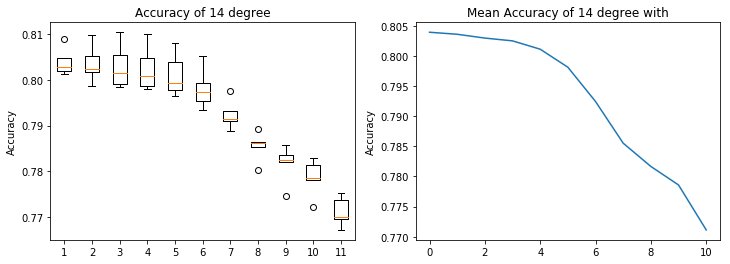

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


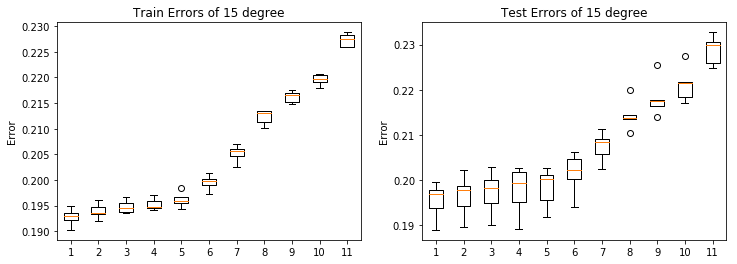

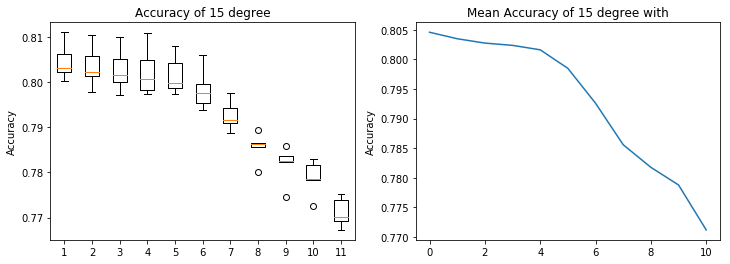

In [6]:
# RMSE - With Outliers

lambdas = np.logspace(-15, -3, 11)
degrees = np.linspace(9,15,7, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr', feature_augmentation=False, hyperparams=[lambdas, False])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


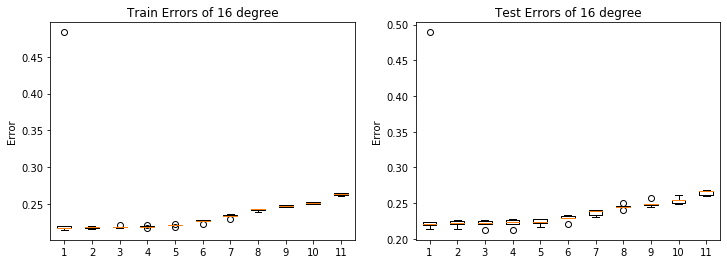

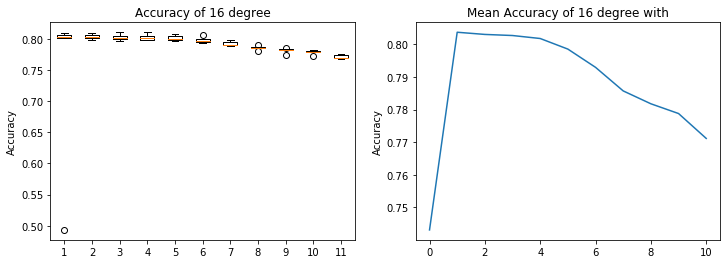

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


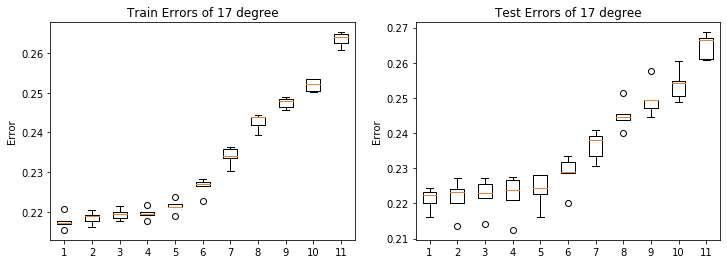

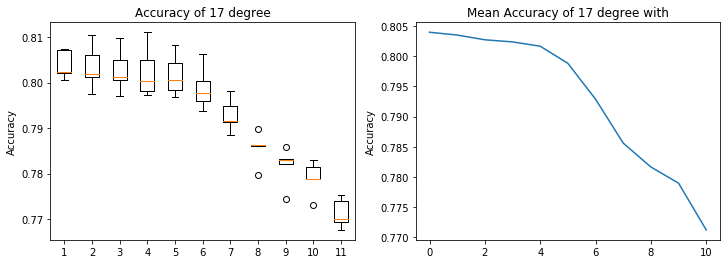

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


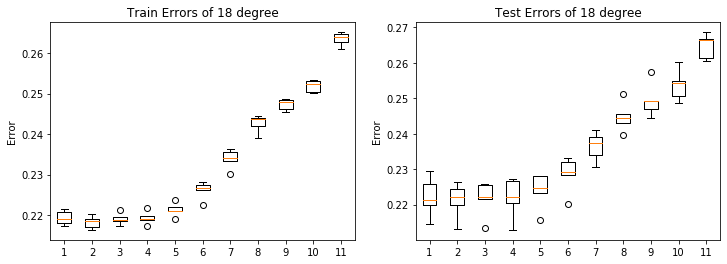

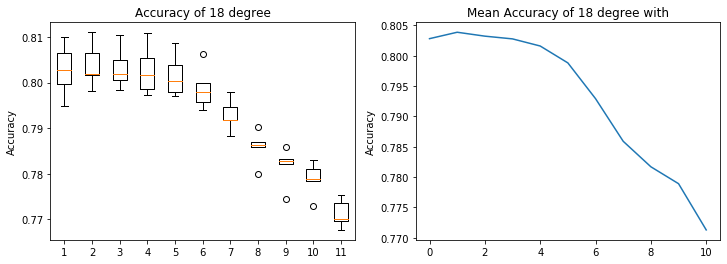

In [8]:
# RMSE - With Outliers

lambdas = np.logspace(-15, -3, 11)
degrees = np.linspace(16,18,3, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'class', method = 'rr', feature_augmentation=False, hyperparams=[lambdas, False])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 35.78153211245809 %


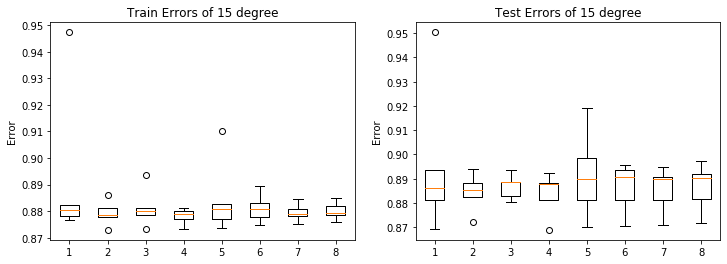

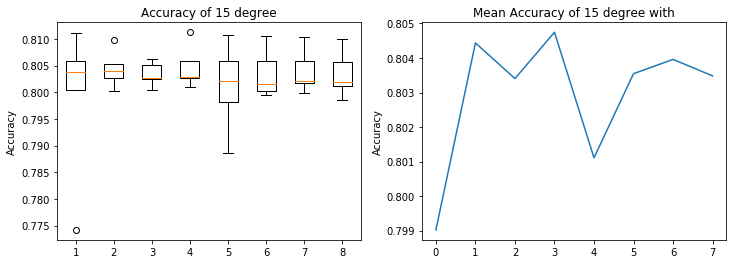

In [16]:
# RMSE - With Outliers

lambdas = np.logspace(-16, -14, 8)
degrees = 15

loss_tr = []
loss_te = []  
w = []
accuracy = []

loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, 15, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr', feature_augmentation=False, hyperparams=[lambdas, False])
loss_tr.append(loss_tr_tmp)
loss_te.append(loss_te_tmp)
w.append(w_tmp)
accuracy.append(acc_tmp)
result_crossval(loss_tr_tmp,loss_te_tmp,degrees)
result_crossval_accuracy(acc_tmp,degrees)

### With features selection and augmentation

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 36.14464046218921 %


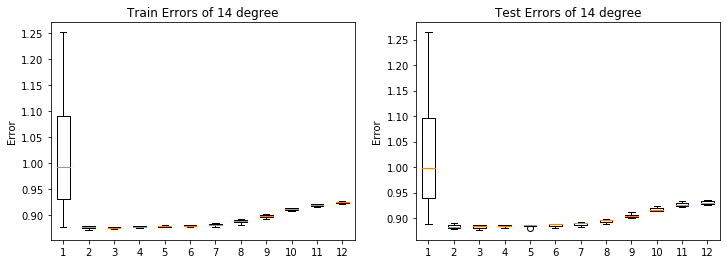

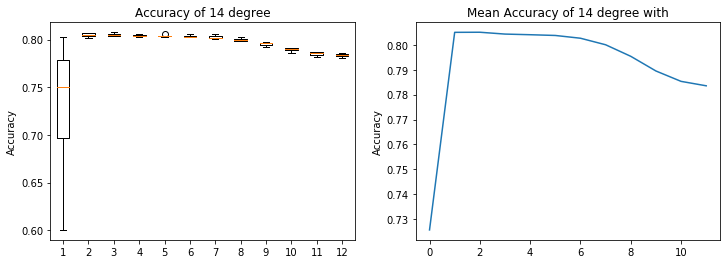

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 36.14464046218921 %


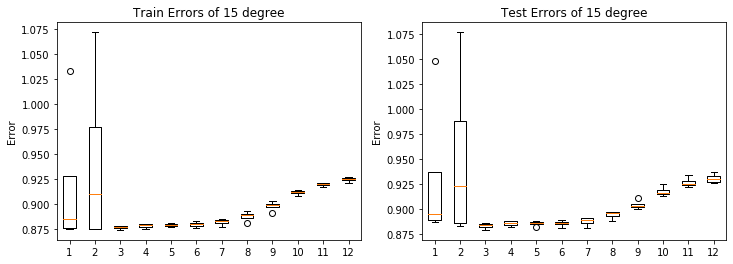

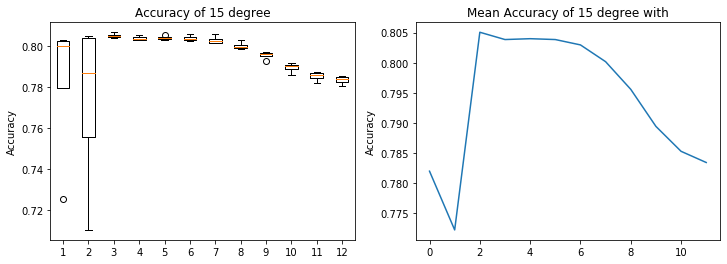

Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 36.14464046218921 %


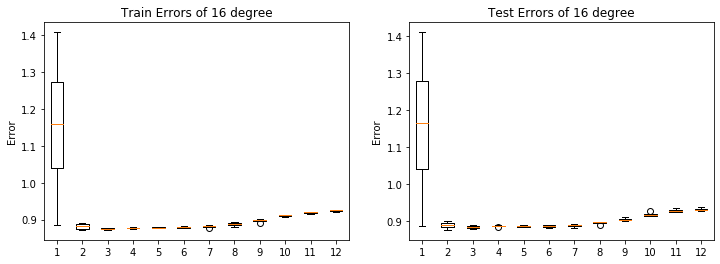

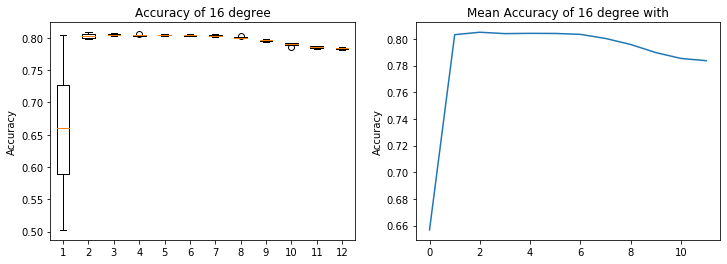

In [23]:
# Feature augmentation

lambdas = np.logspace(-16, -5, 12)
degrees = np.linspace(14,16,3, dtype=int)

for degree in degrees:
    loss_tr, loss_te, w, accu = cross_validation_demo(ss_y, ss_tX, degree = degree, seed = 14, k_fold = 4, class_distribution = False, error ='rmse', method='rr', feature_augmentation=True, hyperparams=[lambdas, False])
    result_crossval(loss_tr,loss_te,degree)
    result_crossval_accuracy(accu,degree)

Ranked absolute correlation with output:  [0.00247231 0.00256178 0.00390937 0.00399311 0.00763413 0.00939262
 0.01150323 0.01692276 0.02431924 0.02976829 0.03885429 0.05697775
 0.13289756 0.15517869 0.15753083 0.15753083 0.15989151 0.18396021
 0.1941607  0.21539337 0.26601088 0.29945282]
Ranked features:  ['PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_met_phi', 'PRI_lep_eta', 'PRI_met', 'DER_mass_vis', 'DER_deltar_tau_lep', 'DER_pt_tot', 'PRI_lep_pt', 'PRI_met_sumet', 'DER_pt_h', 'PRI_jet_leading_pt', 'PRI_jet_all_pt', 'DER_sum_pt', 'DER_mass_MMC', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'DER_met_phi_centrality', 'DER_mass_transverse_met_lep']
Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 36.14464046218921 %
Number of best features tested : 1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Number of best features tested : 2!!!!!!!!!!!!!!!!!!!!!!!

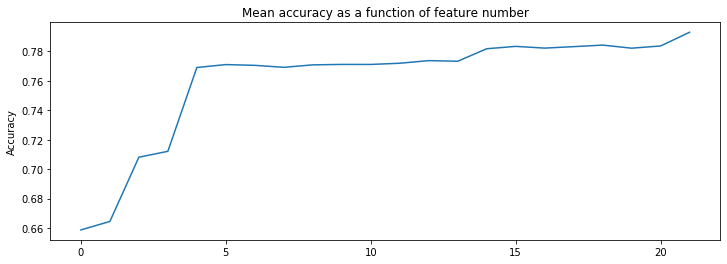

In [36]:
# Feature selection

lambdas = np.logspace(-16, -5, 12)
degree = 15

labels_0, labels_1, labels_2, labels_3 = labels_feat
loss_tr2, loss_te2, w2, accu2 = cross_validation_demo_featselect(ss_y, ss_tX, labels_1, degree, seed = 14, k_fold = 4, class_distribution = False, error ='rmse', method='rr', feature_augmentation=False, hyperparams=[lambdas, False])

result_crossval_accuracy_feat(accu2, lambdas)

Ranked absolute correlation with output:  [0.00247231 0.00256178 0.00390937 0.00399311 0.00763413 0.00939262
 0.01150323 0.01692276 0.02431924 0.02976829 0.03885429 0.05697775
 0.13289756 0.15517869 0.15753083 0.15753083 0.15989151 0.18396021
 0.1941607  0.21539337 0.26601088 0.29945282]
Ranked features:  ['PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_met_phi', 'PRI_lep_eta', 'PRI_met', 'DER_mass_vis', 'DER_deltar_tau_lep', 'DER_pt_tot', 'PRI_lep_pt', 'PRI_met_sumet', 'DER_pt_h', 'PRI_jet_leading_pt', 'PRI_jet_all_pt', 'DER_sum_pt', 'DER_mass_MMC', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'DER_met_phi_centrality', 'DER_mass_transverse_met_lep']
Number of remaining samples before start cross val : 77544
Proportion of Bosons in all train set : 35.73455070669555 %
Proportion of Bosons in test fold 1: 36.14464046218921 %
Number of best features tested : 1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Number of best features tested : 2!!!!!!!!!!!!!!!!!!!!!!!

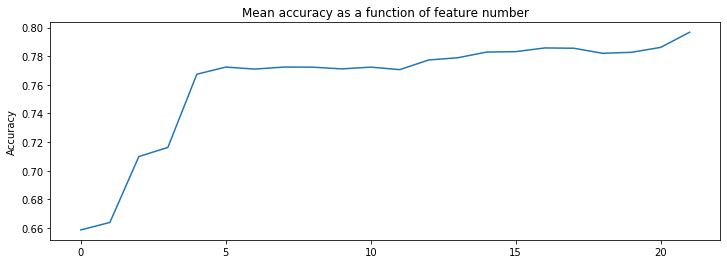

In [37]:
# Feature selection & augmentation

lambdas = np.logspace(-16, -5, 12)
degree = 15

labels_0, labels_1, labels_2, labels_3 = labels_feat
loss_tr23, loss_te3, w3, accu3 = cross_validation_demo_featselect(ss_y, ss_tX, labels_1, degree, seed = 14, k_fold = 4, class_distribution = False, error ='rmse', method='rr', feature_augmentation=True, hyperparams=[lambdas, False])

result_crossval_accuracy_feat(accu3, lambdas)